17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

(25000,) (25000,)
189
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]
239.00925 178.0


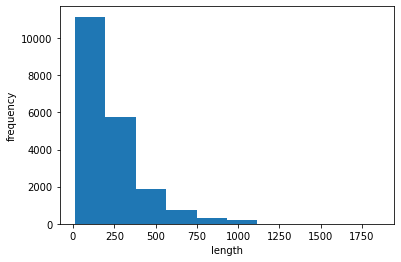

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 13s 37ms/step - loss: 0.6931 - accuracy: 0.5062 - val_loss: 0.6917 - val_accuracy: 0.5578
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6909 - accuracy: 0.5772 - val_loss: 0.6874 - val_accuracy: 0.6260
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6836 - accuracy

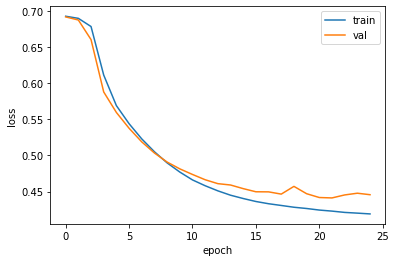

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 14s 38ms/step - loss: 0.6926 - accuracy: 0.5295 - val_loss: 0.6915 - val_accuracy: 0.5862
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6907 - accuracy: 0.5946 - val_loss: 0.6878 - val_accuracy: 0.6526
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6836 - accura

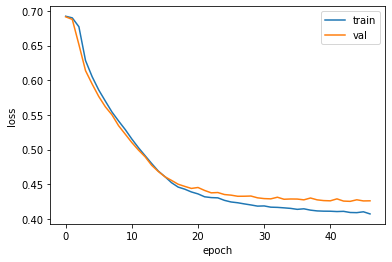

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 26s 75ms/step - loss: 0.6930 - accuracy: 0.5062 - val_loss: 0.6924 - val_accuracy: 0.5530
Epoch 2/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6917 - accuracy: 0.5813 - 

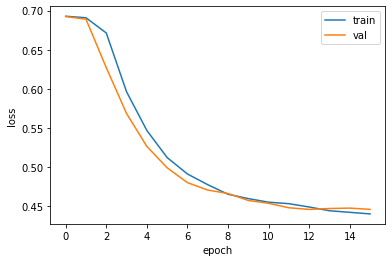

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6926 - accuracy: 0.5252 - val_loss: 0.6915 - val_accuracy: 0.5576
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6904 - accuracy: 0.5863 - val_loss: 0.6889 - val_accuracy: 0.5932
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6869 - accura

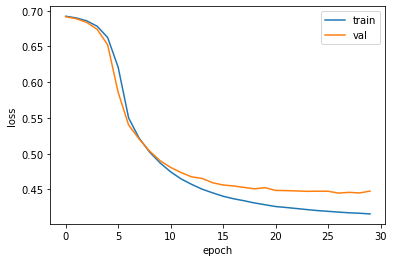

OSError: ignored

In [1]:
#LSTM(Long Short-Term Memory)



from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

print(train_input.shape, test_input.shape)
print(len(train_input[1]))
print(train_target[:20])

from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

import numpy as np
import matplotlib.pyplot as plt

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

from tensorflow import keras
model = keras.Sequential()

model.add(keras.layers.Embedding(500,16, input_length=100))
model.add(keras.layers.LSTM(8)) #(16*8 + 8*8 + 8) * 4
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-LSTM-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#RNN에 dropout 적용
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500,16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3)) #(16*8 + 8*8 + 8) * 4
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


#RNN에 2개의 층을 연결
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500,16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) #(16*8 + 8*8 + 8) * 4
model3.add(keras.layers.LSTM(8, dropout=0.3)) #(16*8 + 8*8 + 8) * 4
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2-layer-connection-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


#GRU(Gated Recurrent Unit)
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500,16, input_length=100))
model4.add(keras.layers.GRU(8)) 
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

In [ ]:
import pandas as pd
df_price = pd.read_csv('01-삼성전자-주가.csv')
df_price.describe()

,a,b,c,d,e,f
count,9.288000e+03,9288.000000,9288.000000,9288.000000,9288.000000,9.288000e+03
mean,2.001347e+07,11108.556417,11228.754522,10986.106481,11108.235465,1.645823e+07
std,1.015376e+05,13792.646300,13920.105135,13658.809496,13790.922497,1.701535e+07
min,1.985010e+07,116.000000,116.000000,115.000000,116.000000,0.000000e+00
25%,1.992121e+07,624.000000,632.000000,620.000000,623.000000,3.833986e+06
50%,2.001032e+07,5045.000000,5190.000000,4955.000000,5075.000000,1.199608e+07
75%,2.010080e+07,15920.000000,16050.000000,15740.000000,15920.000000,2.284080e+07
max,2.020011e+07,57500.000000,57520.000000,56760.000000,57220.000000,3.266220e+08


In [ ]:
pd.to_datetime(df_price['a'], format='%Y%m%d')
# 0      2020-01-07
# 1      2020-01-06
# 2      2020-01-03
# 3      2020-01-02
# 4      2019-12-30

df_price['a'] = pd.to_datetime(df_price['a'], format='%Y%m%d')
df_price['연도'] =df_price['a'].dt.year
df_price['월'] =df_price['a'].dt.month
df_price['일'] =df_price['a'].dt.day

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['b', 'c', 'd', 'e', 'f']
df_scaled = scaler.fit_transform(df_price[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

             b         c         d         e         f
0     0.968632  0.980489  0.979522  0.975133  0.030291
1     0.954691  0.966553  0.961868  0.969880  0.031470
2     0.973860  0.983973  0.967164  0.969880  0.047217
3     0.965147  0.973521  0.968929  0.964626  0.039781
4     0.977346  0.983973  0.981287  0.975133  0.025585
...        ...       ...       ...       ...       ...
9283  0.000174  0.000174  0.000124  0.000123  0.000995
9284  0.000227  0.000226  0.000212  0.000193  0.002587
9285  0.000227  0.000244  0.000229  0.000228  0.002363
9286  0.000227  0.000226  0.000229  0.000210  0.000332
9287  0.000244  0.000244  0.000247  0.000228  0.000342

[9288 rows x 5 columns]


In [ ]:
TEST_SIZE = 200
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [ ]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['b', 'c', 'd', 'e']
label_cols = ['f']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape
# ((6086, 20, 4), (1522, 20, 4))

y_train.shape, y_valid.shape



((7254, 1), (1814, 1))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 16)                1344      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
114/114 [==============================] - 3s 14ms/step - loss: 0.1944 - accuracy: 3.7154e-04 - val_loss: 0.1687 - val_accuracy: 0.0011
Epoch 2/100
114/114 [==============================] - 1s 9ms/step - loss: 0.1624 - accuracy: 2.1721e-04 - val_loss: 0.1334 - val_accuracy: 0.0011
Epoch 3/100
114/114 [==============================] - 1s 9ms/step - loss: 0.1259 - accuracy: 1.5366e-04 - val_loss: 0.0937 - val_accuracy: 0.0011
Epoch 4/100
114/114 [==============================] - 1s 9ms/step - los

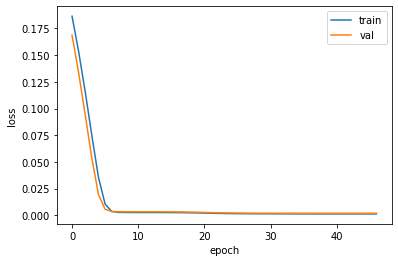

In [ ]:
from tensorflow import keras
model = keras.Sequential()

model.add(keras.layers.LSTM(16, dropout=0.3, input_shape=(train_feature.shape[1], train_feature.shape[2]))) #(16*8 + 8*8 + 8) * 4
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='mean_squared_error', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-LSTM-model-samsung-stock.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()